In [20]:
%reload_ext autoreload
%autoreload 2

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout

from pytrans.ions import Ca40

In [23]:
trap = SurfaceTrap()
waveform = np.load('waveform.npy')

--------------
Trap potential analysis for ion Average[Ca40, Ca40]: 
Equilibrium position [um]
[99.9972  0.0003 67.0811]
Gradient [V/m]
[-0.0577  0.0988 -0.5083]
Displacement at 1 MHz [um]
[-0.0035  0.006  -0.0311]
Hessian [V/m2]
[[ 1.6351e+07 -7.2713e+05 -5.5970e+05]
 [-7.2713e+05  6.2880e+08  7.9995e+07]
 [-5.5970e+05  7.9995e+07  5.6384e+08]]
Normal mode frequencies [MHz]
[0.99996 5.58474 6.4614]
Eigenvectors
[[1 0.00107 0.000865]
 [-0.000118 -0.558 0.83]
 [0.00137 -0.83 -0.558]]
Tilt angle of mode 2 (6.46): 33.95°
--------------
Mode solver analysis for ion crystal [Ca40, Ca40]: 
Equilibrium positions [um]
[[ 97.2037  -0.0026  67.0789]
 [102.8095   0.0036  67.0834]]
Normal modes
  Freq [MHz]                    Ca40                              Ca40
------------  ----------  ----------  ---------  ----------  ---------  ----------
      0.9994   0.7052      0.0004888   0.001117   0.709       0.001033   0.0001026
      1.732    0.709       0.0004782   0.001145  -0.7052     -0.001035 

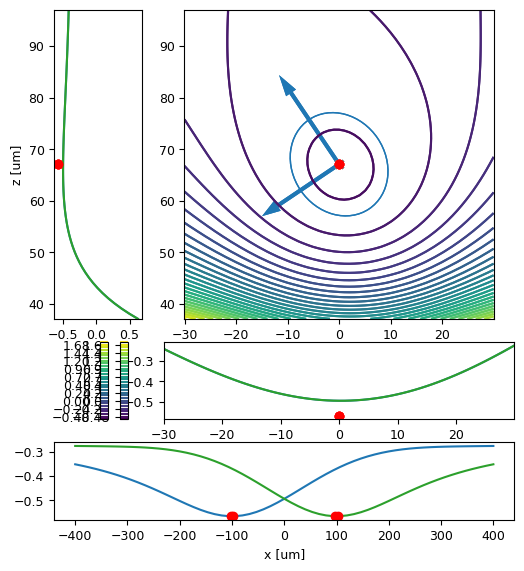

In [24]:
r0 = np.asarray((0, 0, trap.z0)) + np.random.randn(3)*1e-8

fig, axes = plot_potential_make_layout(1)
res = analyse_potential(trap, voltages=waveform[0], ions=[Ca40, Ca40], r0=r0, verbose=False, axes=axes)
res = analyse_potential(trap, voltages=waveform[-1], ions=[Ca40, Ca40], r0=r0, verbose=False, axes=axes)
res

In [25]:
from pytrans.analysis import analyse_waveform

In [26]:
results = analyse_waveform(trap, waveform, ions=[Ca40, Ca40], r0=r0)


Waveform analysis: 100%|██████████| 50/50 [00:14<00:00,  3.50it/s]


In [27]:
x_eq = np.stack([r.x_eq * 1e6 for r in results], axis=0)
freqs = np.stack([r.mode_freqs * 1e-6 for r in results], axis=0)


In [28]:
x_eq2 = np.stack([r.mode_solver_results.x_eq * 1e6 for r in results], axis=0)


In [29]:
x_eq2.shape

(50, 2, 3)

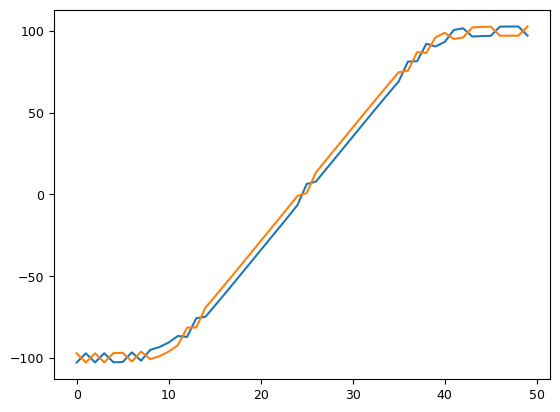

In [30]:
plt.plot(x_eq2[:, :, 0])

In [31]:
xx = x_eq[:, 0]
freqs.shape

(50, 3)

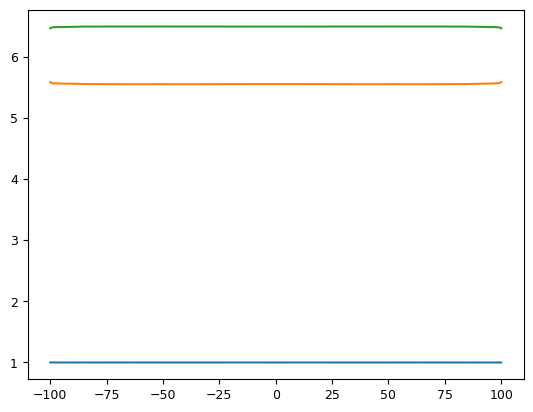

In [32]:

plt.plot(xx, freqs);

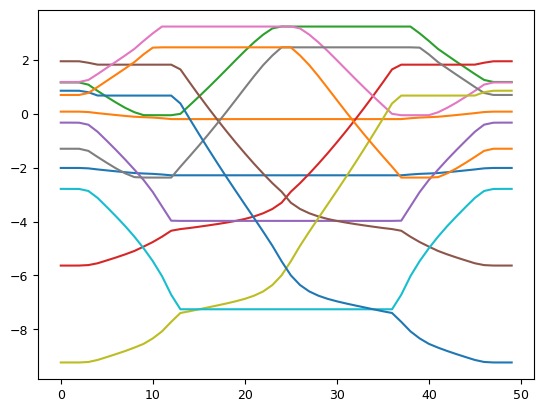

In [33]:
plt.plot(waveform); 

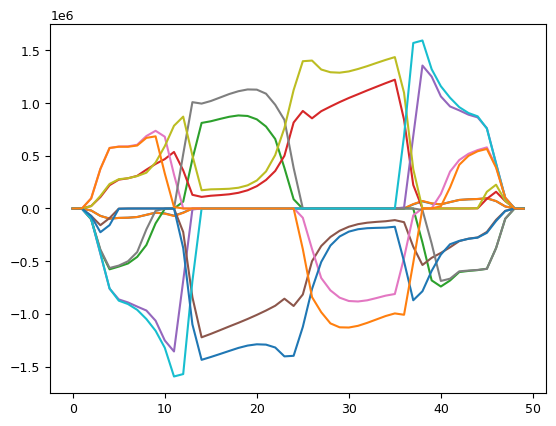

In [34]:
v_diff = np.gradient(waveform, axis=0) / trap.dt
plt.plot(v_diff);

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.PillowWriter'>


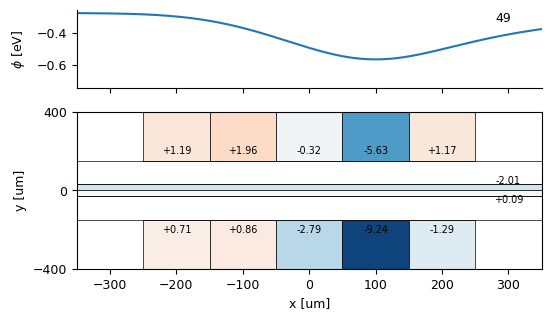

In [35]:
from models.surface_trap.plot import animate_waveform_on_trap

ani = animate_waveform_on_trap(trap, waveform)
ani.save('waveform.gif')


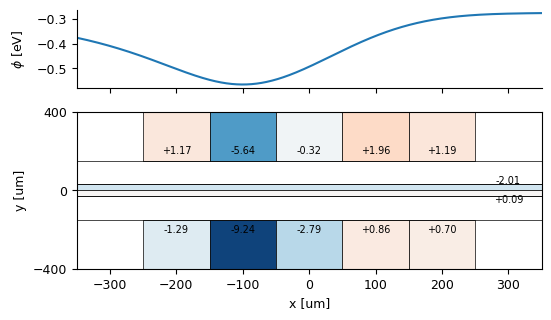

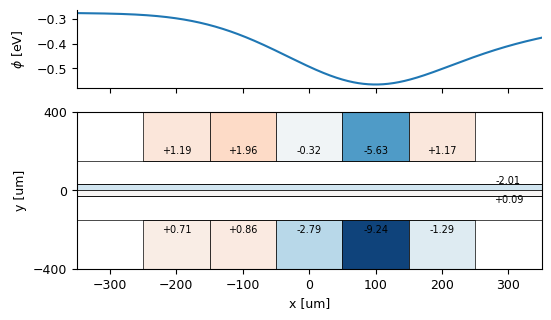

In [39]:
_ = plot_voltages_on_trap(trap, waveform[0])
_ = plot_voltages_on_trap(trap, waveform[-1])


In [37]:
r = results[0]

In [38]:
import json

rj = r.to_json()
with open('r0.json', 'w') as fp:
    json.dump(rj, fp)